In [1]:
import ticktack
from ticktack import fitting as ticktackfit
import ticktacktoe
from ticktacktoe import fitting as ticktacktoefit
from time import process_time
from os import getcwd

In [2]:
models = { # This dictionary contains the units for the fluxes and production function
    "Guttler14": {  # Units of the Guttler 2014 paper
        "production_rate_units": "atoms/cm^2/s",    # Units of the production rate 
        "flow_rate_units": "Gt/yr"                  # Units of the fluxes
    },
    "Brehm21": {    # Units used by the Brehm, et. al. paper
        "production_rate_units": "kg/yr",    # Units of the production rate
        "flow_rate_units": "Gt/yr"           # Units of the fluxes
    },
    "Buntgen18": {  # The units used by the Buntgen 2018 paper
        "production_rate_units": "atoms/cm^2/s",    # Units of the production function
        "flow_rate_units": "Gt/yr"                  # Units of the fluxes 
    },
    "Miyake17": {   # The units used by the Miyake 2017 et. al. paper
        "production_rate_units": "atoms/cm^2/s",    # Units of the production function 
        "flow_rate_units": "1/yr"                   # Units of the fluxes.
    }
}

In [4]:
model_fitting_objects = {
    "Guttler14": None, "Brehm21": None,
    "Buntgen18": None, "Miyake17": None
}

for model in models:
    carbon_box_model = ticktacktoe.load_presaved_model(model, 
    production_rate_units=models[model]["production_rate_units"], 
    flow_rate_units=models[model]["flow_rate_units"])

    fitting_object = ticktacktoefit.SingleFitter(
        carbon_box_model, cbm_model=model)
    fitting_object.load_data(f"{getcwd()}/datasets/775AD/NH/Miyake12_Cedar.csv")
    fitting_object.prepare_function(model="simple_sinusoid")

    model_fitting_objects[model] = fitting_object


In [24]:
tolerance_frame = {"type": [], "year": [], "dc14": []}
time_frame = {"type": [], "time": []}

for model in model_fitting_objects:
    timer = process_time()
    fit_array = model_fitting_objects[model].dc14(
        params=(774.86, 0.25, 0.8, 6.44), rtol=1e-5, atol=1e-5)
    timer = process_time() - timer
    fit_shape = len(fit_array)

    tolerance_frame["type"].extend([model for _ in range(fit_shape)])
    tolerance_frame["year"].extend([year for year in range(fit_shape)])
    tolerance_frame["dc14"].extend(fit_array)

    time_frame["type"].append(model)
    time_frame["time"].append(timer)

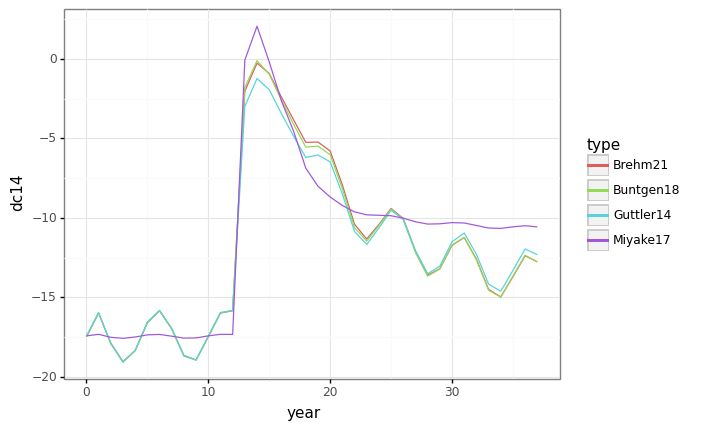

<ggplot: (8754750648215)>

In [62]:
tolerance_frame = DataFrame(tolerance_frame)
(ggplot()
    + geom_line(
        data=tolerance_frame, 
        mapping=aes(x="year", y="dc14", color="type")
    )
    + theme_bw())

In [42]:
tolerance_frame = {"type": [], "rtol": [], "atol": [], "year": [], "dc14": []}
toleracne_range = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

for model in model_fitting_objects:
    for atol in toleracne_range:
        for rtol in toleracne_range:
            fit_array = model_fitting_objects[model].dc14(
                params=(774.86, 0.25, 0.8, 6.44), rtol=rtol, atol=atol)
            fit_shape = len(fit_array)

            tolerance_frame["type"].extend([model for _ in range(fit_shape)])
            tolerance_frame["rtol"].extend([rtol for _ in range(fit_shape)])
            tolerance_frame["atol"].extend([atol for _ in range(fit_shape)])
            tolerance_frame["year"].extend([year for year in range(fit_shape)])
            tolerance_frame["dc14"].extend(fit_array)

In [7]:
from plotnine import *
from pandas import DataFrame

/home/jordan/anaconda3/envs/beyondticktack/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


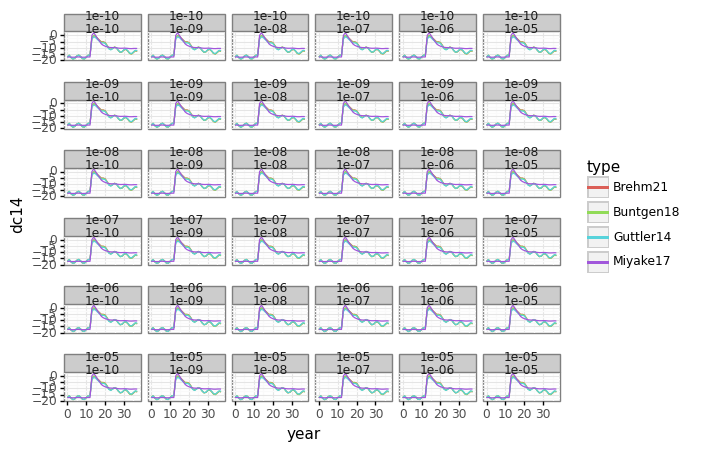

<ggplot: (8729345316337)>

In [44]:
tolerance_frame = DataFrame(tolerance_frame)
(ggplot(tolerance_frame, aes(x="year", y="dc14", color="type"))
    + geom_line()
    + theme_bw()
    + facet_wrap(facets="~ atol + rtol"))

In [25]:
MODULES = {
    "ticktack": [ticktack, ticktackfit], 
    "ticktacktoe": [ticktacktoe, ticktacktoefit]
}

In [42]:
module_profiles = {"ticktack": [], "ticktacktoe": []}
for module in MODULES:
    carbon_box_model = MODULES[module][0].load_presaved_model(
        "Guttler14", production_rate_units="atoms/cm^2/s")
        
    fitting_object = MODULES[module][1].SingleFitter(
        carbon_box_model, cbm_model="Guttler14")
    fitting_object.load_data(f"{getcwd()}/datasets/775AD/NH/Miyake12_Cedar.csv")
    fitting_object.prepare_function(model="simple_sinusoid")

    timer = process_time()
    
    timer = process_time() - timer
    module_profiles[module].append(timer)


In [43]:
module_profiles

{'ticktack': [2.669819313000005], 'ticktacktoe': [7.332135637]}